In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import spacy

In [8]:
data = pd.read_csv("BA_AirlineReviews_number.csv")
data.head()

,Rating,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,1.0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,Nov-23,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1.0,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,Nov-23,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,0.0,2.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,Nov-23,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,1.0,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,Dec-22,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,1.0,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,Nov-23,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [9]:
data.columns

Index(['Rating', 'OverallRating', 'ReviewHeader', 'Name', 'Datetime',
       'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route',
       'DateFlown', 'SeatComfort', 'CabinStaffService', 'GroundService',
       'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages',
       'InflightEntertainment', 'Wifi&Connectivity'],
      dtype='object')

In [33]:
data = data[["OverallRating","ReviewBody"]]

In [34]:
data.head()

,OverallRating,ReviewBody
0,1.0,4 Hours before takeoff we receive a Mail stati...
1,3.0,I recently ha a elay on British Airways from B...
2,2.0,"Boare on time, but it took ages to get to the ..."
3,1.0,"5 ays before the flight, we were avise by BA t..."
4,1.0,"We travele to Lisbon for our ream vacation, a ..."


In [35]:
# TO check for null values

data["ReviewBody"].isnull().sum()

0

In [36]:
# TO check for NA values

data["ReviewBody"].isna().sum()

0

In [37]:
nlp = spacy.load("en_core_web_sm")

In [38]:
# importing the display module to display the diagram

from spacy import displacy

In [40]:
# To check for duplicated fill or characters

data.duplicated().sum()

9

In [42]:
data['ReviewBody'].drop_duplicates(inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5540\1290175872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ReviewBody'].drop_duplicates(inplace = True)


In [43]:
data.duplicated().sum()

0

In [44]:
data.head()

,OverallRating,ReviewBody
0,1.0,4 Hours before takeoff we receive a Mail stati...
1,3.0,I recently ha a elay on British Airways from B...
2,2.0,"Boare on time, but it took ages to get to the ..."
3,1.0,"5 ays before the flight, we were avise by BA t..."
4,1.0,"We travele to Lisbon for our ream vacation, a ..."


In [46]:
## to check for blanks or blank spaces

blanks = []
for index in data['ReviewBody']:
    if index.isspace() == True:
        blanks.append(index)

In [47]:
print(blanks)

[]


In [48]:
data['OverallRating'].value_counts().sort_values()

OverallRating
6.0     189
5.0     234
4.0     253
3.0     406
1.0     864
2.0    1741
Name: count, dtype: int64

<Axes: xlabel='OverallRating'>

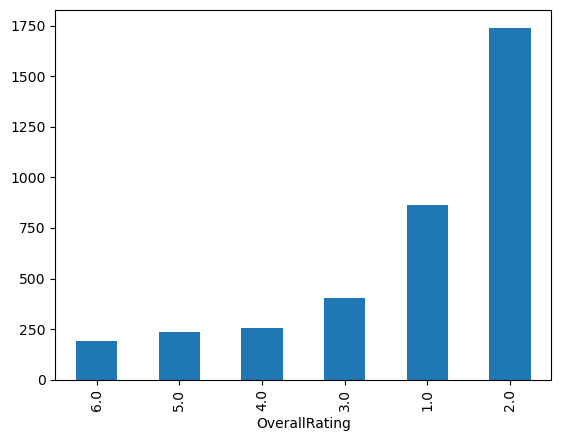

In [49]:
data['OverallRating'].value_counts().sort_values().plot(kind = "bar")

In [57]:
# splitting the rating into positive and negative

def rating(rating):
    if rating >=3 and rating <= 6:
        return "positive"
    if rating >0 and rating < 3:
        return "negative"

In [60]:
def rating(rating):
    if rating >= 4.0 and rating <=6.0:
        return "positive"
    if rating >=0.0 and rating <=3.0:
        return "negative"

In [61]:
data['rating'] = data['OverallRating'].apply(rating)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5540\3479333893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = data['OverallRating'].apply(rating)


In [62]:
data.head()

,OverallRating,ReviewBody,rating
0,1.0,4 Hours before takeoff we receive a Mail stati...,negative
1,3.0,I recently ha a elay on British Airways from B...,negative
2,2.0,"Boare on time, but it took ages to get to the ...",negative
3,1.0,"5 ays before the flight, we were avise by BA t...",negative
4,1.0,"We travele to Lisbon for our ream vacation, a ...",negative


<Axes: xlabel='rating'>

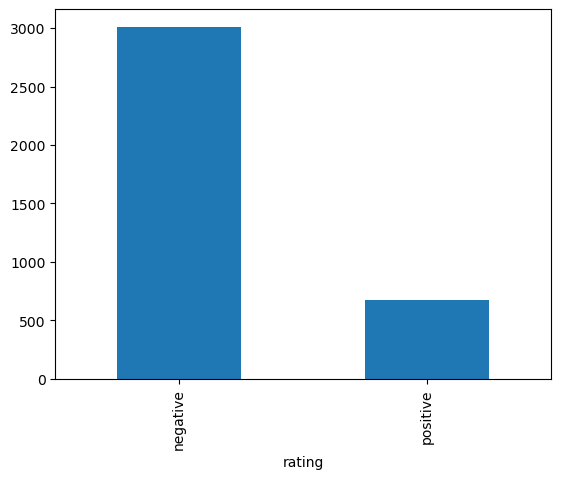

In [65]:
data['rating'].value_counts().plot(kind = 'bar')

In [66]:
# Sentiment Analysis

import nltk
import spacy
from nltk.sentiment import SentimentIntensityAnalyzer

In [67]:
sentanalyze = SentimentIntensityAnalyzer()

In [68]:
# It creates a column Scores and append the polarity sentiment scores inside it.

data['scores'] = data['ReviewBody'].apply(lambda review: sentanalyze.polarity_scores(review))

C:\Users\DELL\AppData\Local\Temp\ipykernel_5540\4008210813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['scores'] = data['ReviewBody'].apply(lambda review: sentanalyze.polarity_scores(review))


In [69]:
data.head()

,OverallRating,ReviewBody,rating,scores
0,1.0,4 Hours before takeoff we receive a Mail stati...,negative,"{'neg': 0.125, 'neu': 0.863, 'pos': 0.012, 'co..."
1,3.0,I recently ha a elay on British Airways from B...,negative,"{'neg': 0.093, 'neu': 0.81, 'pos': 0.096, 'com..."
2,2.0,"Boare on time, but it took ages to get to the ...",negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,1.0,"5 ays before the flight, we were avise by BA t...",negative,"{'neg': 0.092, 'neu': 0.803, 'pos': 0.106, 'co..."
4,1.0,"We travele to Lisbon for our ream vacation, a ...",negative,"{'neg': 0.0, 'neu': 0.981, 'pos': 0.019, 'comp..."


In [71]:
# TO view row number 53

data.iloc[53]['scores']

{'neg': 0.123, 'neu': 0.806, 'pos': 0.071, 'compound': -0.9649}

In [72]:
# creating a compound column to contain the values of the classification

data['compound'] = data['scores'].apply(lambda f: f['compound'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_5540\846856740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['compound'] = data['scores'].apply(lambda f: f['compound'])


In [73]:
# From 0 to 1 indicates positive reviews while negative reviews are indicated by negative numbers

data.head()

,OverallRating,ReviewBody,rating,scores,compound
0,1.0,4 Hours before takeoff we receive a Mail stati...,negative,"{'neg': 0.125, 'neu': 0.863, 'pos': 0.012, 'co...",-0.9392
1,3.0,I recently ha a elay on British Airways from B...,negative,"{'neg': 0.093, 'neu': 0.81, 'pos': 0.096, 'com...",0.1779
2,2.0,"Boare on time, but it took ages to get to the ...",negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,1.0,"5 ays before the flight, we were avise by BA t...",negative,"{'neg': 0.092, 'neu': 0.803, 'pos': 0.106, 'co...",0.5919
4,1.0,"We travele to Lisbon for our ream vacation, a ...",negative,"{'neg': 0.0, 'neu': 0.981, 'pos': 0.019, 'comp...",0.4724


In [74]:
data['compound_rating']= data['compound'].apply(lambda score: 'positive' if score >= 0 else 'negative')

C:\Users\DELL\AppData\Local\Temp\ipykernel_5540\880319131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['compound_rating']= data['compound'].apply(lambda score: 'positive' if score >= 0 else 'negative')


In [76]:
data.head()

,OverallRating,ReviewBody,rating,scores,compound,compound_rating
0,1.0,4 Hours before takeoff we receive a Mail stati...,negative,"{'neg': 0.125, 'neu': 0.863, 'pos': 0.012, 'co...",-0.9392,negative
1,3.0,I recently ha a elay on British Airways from B...,negative,"{'neg': 0.093, 'neu': 0.81, 'pos': 0.096, 'com...",0.1779,positive
2,2.0,"Boare on time, but it took ages to get to the ...",negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive
3,1.0,"5 ays before the flight, we were avise by BA t...",negative,"{'neg': 0.092, 'neu': 0.803, 'pos': 0.106, 'co...",0.5919,positive
4,1.0,"We travele to Lisbon for our ream vacation, a ...",negative,"{'neg': 0.0, 'neu': 0.981, 'pos': 0.019, 'comp...",0.4724,positive


In [79]:
# Sentiment Classification

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
# creating our pipeline

textclf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [85]:
x = data['ReviewBody']
y = data['compound_rating']

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 50)

In [87]:
# Using SVM classifier

textclf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [88]:
prediction = textclf.predict(X_test)
prediction

array(['positive', 'positive', 'negative', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [90]:
print(accuracy_score(y_test, prediction))

0.796028880866426


In [91]:
cm = confusion_matrix(y_test, prediction)
cm

array([[178, 153],
       [ 73, 704]], dtype=int64)

In [93]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc("figure", figsize = (20,10))

In [94]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display

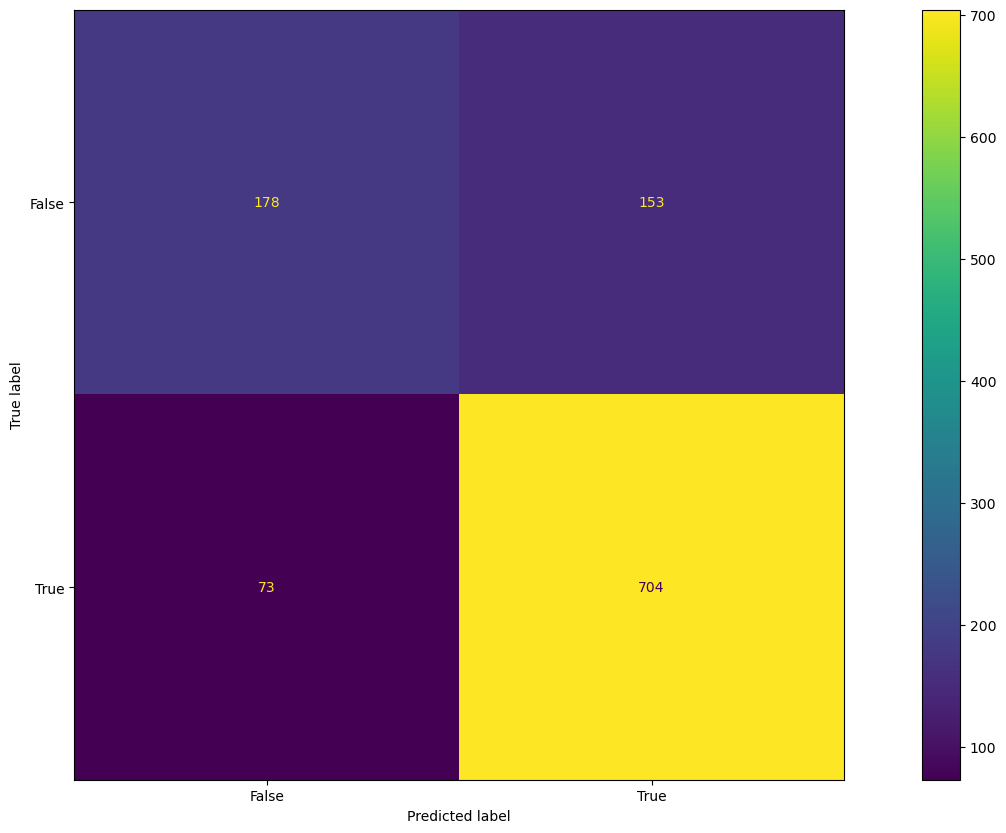

In [95]:
cm_display.plot()
plt.show()